# 逻辑斯蒂回归
## 逻辑斯蒂模型
### 逻辑斯蒂分布
逻辑斯蒂分布：设X为连续变量，X服从逻辑斯蒂分布是指X具有下列分布函数和密度函数：
$$
F(x)=P(X\le x)=\frac{1}{1+e^{-(x-\mu)/\gamma}}\\
f(x)=F'(x)=\frac{e^{-(x-\mu)/\gamma}}{\gamma (1+e^{-(x-\mu)/\gamma})^2}
$$
其中$\mu$为位置参数，$\gamma$为形状参数,其形状如下。

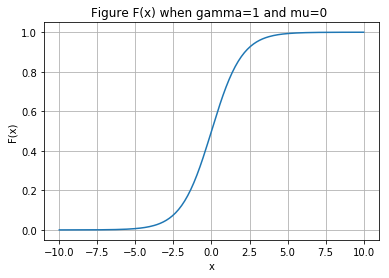

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def F(gamma = 1, mu = 0):
    x=np.linspace(-10,10,200)
    y=1/(1+np.exp((-x + mu)/gamma))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('F(x)')
    ax.set_title('Figure F(x) when gamma=1 and mu=0 ')
    ax.grid()
    plt.show()
F()

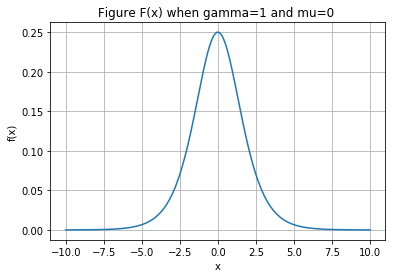

In [19]:
def f(gamma = 1, mu = 0):
    x=np.linspace(-10,10,200)
    y=np.exp((-x + mu)/gamma)/np.power((1+np.exp((-x + mu)/gamma)), 2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Figure F(x) when gamma=1 and mu=0 ')
    ax.grid()
    plt.show()
f()

### 二项逻辑斯蒂回归模型
二项逻辑斯蒂回回归模型是一种***分类模型***，有条件概率分布表示。
**逻辑斯蒂回归模型** 二项逻辑斯蒂回归模型是如下条件概率分布：
$$
P(Y=1|X)=\frac{exp(w\cdot x+b)}{1+exp(w\cdot x+b)}\\
P(Y=0|X)=\frac{1}{1+exp(w\cdot x+b)}
$$
若将w记为$(w^{(1)},w^{(2)},\dots w^{(n)},b)^T$,将x记为$(x^{(1)},x^{(2)},\dots x^{(n)},1)^T$,此时，逻辑斯蒂回归模型如下:
$$
P(Y=1|x=\frac{exp(w\cdot x)}{1+exp(w\cdot x)}\\
P(Y=0|x)=\frac{1}{1+exp(w\cdot x)}
$$
一个事件发生的机率是指该事件发生的概率与不发生的概率的比值，若该事件发生概率为p，则发生的机率为$\frac{p}{1-p}$,该事件的对数几率为
$$
logit(p)=log\frac{p}{1-p}
$$
则对逻辑斯蒂回归而言，
$$
log(\frac{P(Y=1|X)}{1-P(Y=1|X)})=w\cdot x
$$
换一个角度看，考虑对输入x进行分类的线性函数$w\cdot x$,其值域为实数域，通过逻辑斯蒂回归模型可以将线性函数转换为概率。
### 模型参数估计
对于给定的训练数据集$T=\{(x_1,y_1),(x_1,y_1),\cdots,(x_N,y_N),\}$,其中，$x_i\in R^n$,$y_i\in\{0,1\}$,可以采用极大似然估计法估计模型参数，从而得到逻辑斯蒂回归模型。
设：
$$
P(Y=1|x)=\pi(x)\qquad P(Y=0|x)=1-\pi(x)
$$
似然函数为
$$
\prod^N_{i=1}[\pi(x_i)]^{y_i}[1-\pi(x_i)]^{y_i}
$$
对数似然函数为
$$
L(w)=\sum^N_{i=1}[y_ilog(\pi(x_i))+(1-y_i)log(1-\pi(x_i))]\\
=\sum^N_{i=1}[y_ilog\frac{\pi(x_i)}{1-\pi(x_i)}+log(1-\pi(x_i))]\\
=\sum^N_{i=1}[y_i(w\cdot x)-log(1+exp(w\cdot x_i))]
$$
这样，问题就变成了以对数似然函数为目标函数的最优化问题。
假设w的极大似然估计为$\hat{w}$，那么学到的逻辑斯蒂回归模型为
$$
P(Y=1|x)=\frac{exp(\hat{w}\cdot x)}{1+exp(\hat{w}\cdot x)}\\
P(Y=0|X)=\frac{1}{1+exp(\hat{w}\cdot x)}
$$
### 多项逻辑斯蒂回归
以上提及的逻辑斯蒂回归模型为二分类模型，对于Y的取值集合为{1,2,...,K},多项逻辑斯蒂回归模型是
$$
P(Y=k|x)=\frac{exp(w_k\cdot x)}{1+\sum_{k=1}^{K-1}exp(w_k\cdot x)}\quad k=1,2,\cdots,K-1\\
P(Y=0|x)=\frac{1}{1+\sum_{k=1}^{K-1}exp(w_k\cdot x)}
$$

In [174]:
import numpy as np
class logistic_regression:
    def __init__(self, lr = 0.01, epoch = 50):
        self.lr = lr
        self.epoch = epoch
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, X, Y):
        self._w = np.random.randn(X.shape[1]+1)*0.01
        for _ in range(self.epoch):
            for xi,y in zip(X, Y):
                error = y - (self.sigmoid(np.dot(xi, self._w[1:]) + self._w[0]))
                self._w[1:] += self.lr * error * xi
                self._w[0] += self.lr * error
        return self
    
    def predict(self, X):
        return np.where(np.dot(X, self._w[1:]) + self._w[0] >= 0, 1, 0)
    
    def score(self, X, Y):
        res = self.predict(X)
        wrong = res^Y
        return 1-wrong.mean()

In [175]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df.values[:100]
y = np.where(iris.target == 0, 0, 1)[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr_clf = logistic_regression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

1.0

## 最大熵模型
### 最大熵原理
最大熵原理认为，学习概率模型时，在所有可能的概率模型（分布）中，熵最大的模型是最好的模型，也可以表述为满足约束条件的模型集合中选取熵最大的模型。

### 最大熵模型的定义
假设分类模型是一个条件概率分布P(X|Y)，表示对于给定输入X，以条件概率P(X|Y)输出Y。
给定训练数据集，可以确定联合概率分布P(X,Y)的经验分布和边缘分布P(X)的经验分布,分别以$\widetilde{P}(X,Y)\quad\widetilde{P}(X)$来表示。
$$
\widetilde{P}(X=x,Y=y)=\frac{v(X=x,Y=y)}{N}\\
\widetilde{P}(X=x)=\frac{v(X=x)}{N}
$$
用特征函数f(x,y)描述输入x和输入y之间的某一个事实，其定义为
$$
f(x,y)=
\begin{cases}
1,\quad x,y满足某个事实\\
0，\quad 否则
\end{cases}
$$
特征函数关于经验分布$\widetilde{P}(X,Y)$的期望值，用$E_{\widetilde{P}}(f)$表示
$$
E_{\widetilde{P}}(f)=\sum_{x,y}\widetilde{P}(x,y)f(x,y)
$$
特征函数关于模型P(Y|X)与经验分布$\widetilde{P}(X)$的期望值，用$E_{P}(f)$表示
$$
E_{P}(f)=\sum_{x,y}\widetilde{P}(x)P(y|x)f(x,y)
$$
**最大熵模型** 假设满足所有约束条件的模型集合为
$$
C \equiv\{P\in \operatorname{P}|E_P(f_i)=E_{\widetilde{P}}(f_i),\quad i=1,2,\cdots,n\}
$$
定义在条件概率分布上的条件熵为
$$
H(P)=-\sum_{x,y}\widetilde{P}(x)P(y|x)logP(y|x)
$$
### 最大熵模型的学习
对于给定的训练数据集$T=\{(x_1,y_1), (x_2,y_2), \cdots, (x_N, y_N)\}|$以及特征函数$f_i(x,y)$,最大熵模型的学习等价于约束最优化问题。
$$
\max_{P\in C}\quad H(P)=-\sum_{x,y}\widetilde{P}(x)P(y|x)logP(y|x)\\
s.t.\quad E_P(f_i)=E_{\widetilde{P}}(f_i),\quad i=1,2,\cdots,n\\
\sum_yP(y|x)=1
$$